In [2]:
import wget

In [4]:
url = 'https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt'
wget.download(url)

100% [................................................................................] 2791 / 2791

'categories (2).txt'

In [1]:
f = open("categories3.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [2]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)

['angel', 'ant', 'apple', 'axe', 'banana', 'basket', 'bear', 'bed', 'bee', 'bird', 'book', 'bread', 'bridge', 'broom', 'bucket', 'butterfly', 'cactus', 'cake', 'candle', 'carrot', 'castle', 'cat', 'chair', 'circle', 'clock', 'cloud', 'cookie', 'couch', 'cow', 'crab', 'crown', 'cup', 'diamond', 'dog', 'dolphin', 'donut', 'door', 'dragon', 'duck', 'eraser', 'face', 'feather', 'fish', 'flower', 'fork', 'garden', 'grapes', 'grass', 'guitar', 'hammer', 'hat', 'hedgehog', 'hexagon', 'horse', 'house', 'hurricane', 'ice_cream', 'jacket', 'key', 'ladder', 'leaf', 'lightning', 'lipstick', 'map', 'monkey', 'moon', 'mountain', 'mushroom', 'necklace', 'ocean', 'octagon', 'octopus', 'onion', 'pants', 'parrot', 'peanut', 'pear', 'pencil', 'piano', 'pig', 'pillow', 'pineapple', 'pond', 'potato', 'rabbit', 'rain', 'rainbow', 'river', 'sandwich', 'sea_turtle', 'shark', 'sheep', 'shoe', 'skull', 'smiley_face', 'snail', 'snake', 'snowman', 'sock', 'spider', 'spoon', 'square', 'squirrel', 'stairs', 'star',

In [3]:
!mkdir data3

In [5]:
import urllib.request

def download():
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:
        cls_url = c.replace('_', '%20')
        path = base + cls_url + '.npy'
        print(path)
        urllib.request.urlretrieve(path, 'data3/' + c + '.npy')

In [6]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/angel.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/axe.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/basket.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bear.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bed.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bee.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bread.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bridge.npy
https:/

In [7]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

# 코드 내에서 사용되는 기능 중 deprecation 경고를 발생시키는 것이 있을 수 있음
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [8]:
def load_data(root, vfold_ratio=0.1, max_items_per_class=20000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        print(idx)
        # print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [9]:
x_train, y_train, x_test, y_test, class_names = load_data('data3')
num_classes = len(class_names)
image_size = 28

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


In [10]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

2250000
2250000
250000
250000


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  84. 195. 111.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  96. 255. 231. 253.
   71.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  45. 247. 179.   9. 202.
  235.  28.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 190. 231.  16.   0.  32.
  238. 196.   5.   0.   0.   0.   0.   0.   0.   0.   0.  

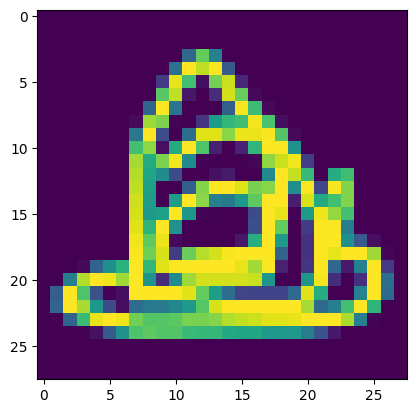

In [11]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
print(x_train[idx].reshape(28,28))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [12]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))

model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(125, activation='softmax')) 
# Train model
adam = tf.keras.optimizers.Adam()  # 수정된 부분
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['top_k_categorical_accuracy'])
print(model.summary())

2250000
2250000
250000
250000
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                     

In [21]:
hist = model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Epoch 1/5
7911/7911 - 432s - loss: 0.6933 - top_k_categorical_accuracy: 0.9524 - val_loss: 0.7228 - val_top_k_categorical_accuracy: 0.9488 - 432s/epoch - 55ms/step
Epoch 2/5
7911/7911 - 431s - loss: 0.6891 - top_k_categorical_accuracy: 0.9528 - val_loss: 0.7204 - val_top_k_categorical_accuracy: 0.9496 - 431s/epoch - 54ms/step
Epoch 3/5
7911/7911 - 366s - loss: 0.6858 - top_k_categorical_accuracy: 0.9532 - val_loss: 0.7168 - val_top_k_categorical_accuracy: 0.9494 - 366s/epoch - 46ms/step
Epoch 4/5
7911/7911 - 445s - loss: 0.6822 - top_k_categorical_accuracy: 0.9535 - val_loss: 0.7168 - val_top_k_categorical_accuracy: 0.9500 - 445s/epoch - 56ms/step
Epoch 5/5
7911/7911 - 439s - loss: 0.6800 - top_k_categorical_accuracy: 0.9538 - val_loss: 0.7113 - val_top_k_categorical_accuracy: 0.9493 - 439s/epoch - 55ms/step


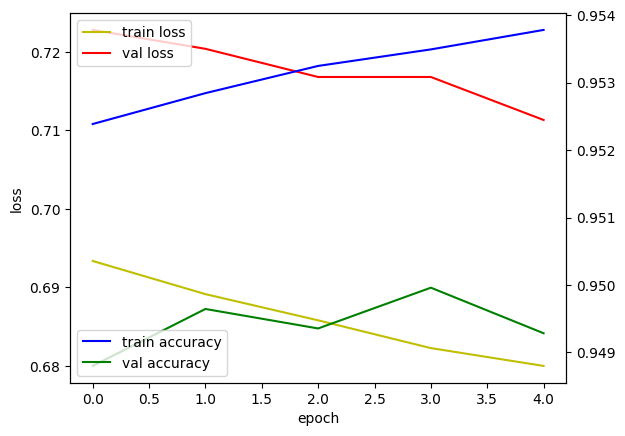

In [22]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['top_k_categorical_accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_top_k_categorical_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [23]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

2250000
2250000
250000
250000
Test accuarcy: 95.06%


1/1 [==============================] - 0s 127ms/step
['candle', 'lipstick', 'ice_cream', 'bucket', 'cup']


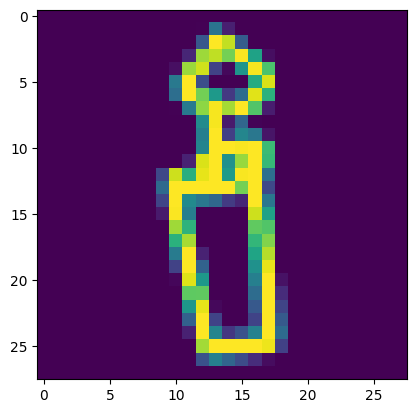

In [16]:

idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [17]:
with open('class_names3.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [35]:
!pip install tensorflowjs

     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
      --------------------------------------- 0.2/15.2 MB 3.9 MB/s eta 0:00:04
     - -------------------------------------- 0.5/15.2 MB 4.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.9/15.2 MB 6.1 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/15.2 MB 6.6 MB/s eta 0:00:03
     ---- ----------------------------------- 1.7/15.2 MB 7.2 MB/s eta 0:00:02
     ----- ---------------------------------- 2.2/15.2 MB 7.8 MB/s eta 0:00:02
     ------ --------------------------------- 2.7/15.2 MB 8.5 MB/s eta 0:00:02
     ------- -------------------------------- 2.8/15.2 MB 7.6 MB/s eta 0:00:02
     -------- ------------------------------- 3.3/15.2 MB 8.1 MB/s eta 0:00:02
     --------- ------------------------------ 3.6/15.2 MB 7.9 MB/s eta 0:00:02
     ---------- ----------------------------- 3.9/15.2 MB 7.8 MB/s eta 0:00:02
     ----------- ---------------------------- 4.2/15.2 MB 7

In [24]:
model.save('thmodel2.h5')

In [5]:
!tensorflowjs_converter --input_format keras keras.h5 model/

2024-03-11 08:54:39.549243: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\SSAFY\anaconda3\envs\test_tensorflow_0308\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Users\SSAFY\anaconda3\envs\test_tensorflow_0308\Lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\SSAFY\anaconda3\envs\test_tensorflow_0308\Lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\SSAFY\anaconda3\envs\test_tensorflow_0308\Lib\site-packages\t